A radiation detector is a solid cylinder that is 20 cm in diameter, 40 cm long, and located 50 cm above a source of radioactivity at the origin, as shown in the diagram below:
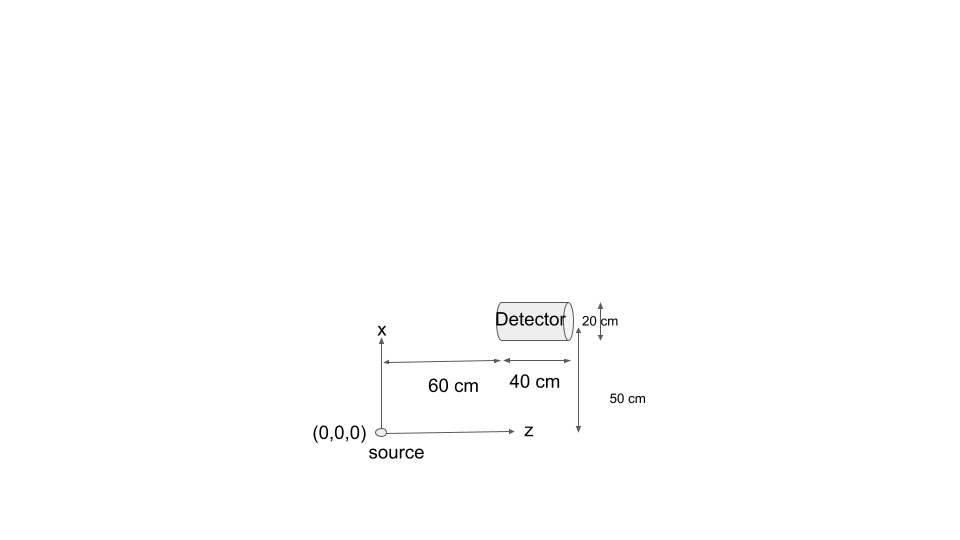

The detector axis is along the z-axis, and the ends of the detector are at (50,0,60)cm and (50,0,100)cm.
We can describe any point in the detector by its $\rho,z',$ and $\phi'$ coordinates:
$$\vec{r}=\vec{x_c}+(\rho \cos \phi',\rho \sin\phi', z')$$
with $\vec{x_c}=(0.5,0,.60)$ m.

1.  Write a function, thetaphi($\rho,\phi',z'$) that calculates the spherical coordinates $\theta$, $\phi$ with respect to the origin and the origin's axes. Return the angles as a tuple. Plot theta and phi as a function of $z'$  for $\rho=0.1$ m (the outside of the detector) and for $\phi'=0, \pi/2, \pi,3\pi/2.$
Also plot theta and phi as a function of $\phi'$ for $z'=0$ and for $z'=0.4.$

Finally, on a single plot draw $\theta$ as a function of $\phi$ for 4 lines: $z=0, z=0.4, \phi'=\pi/2, \phi'=3\pi/2.$



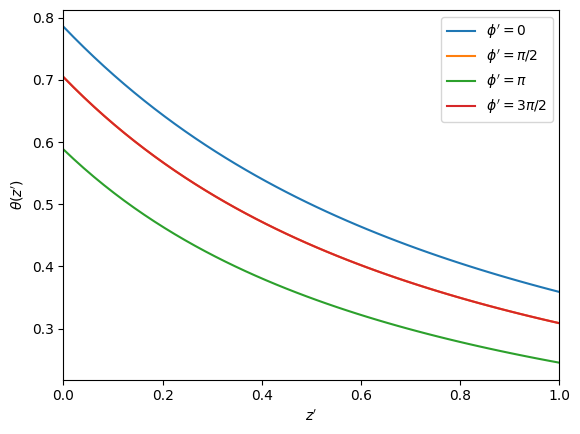

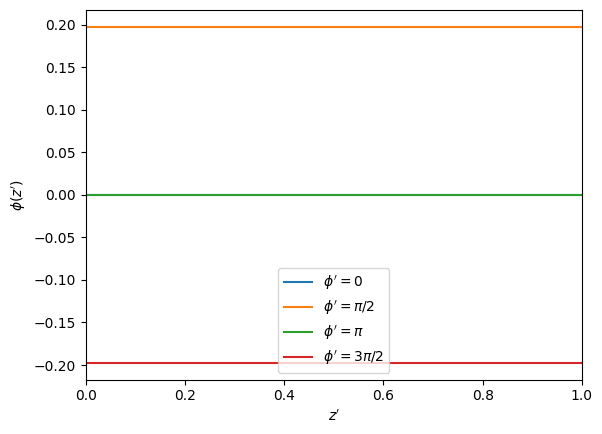

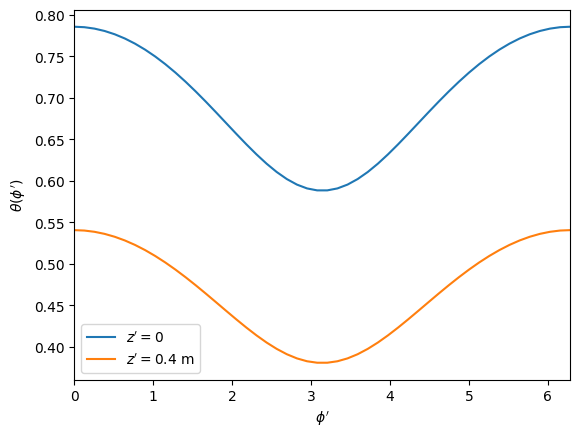

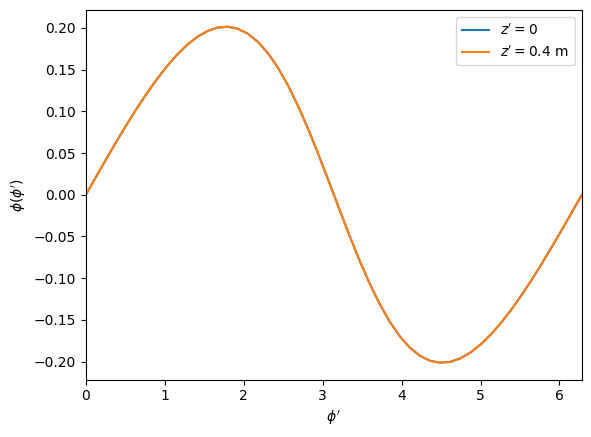

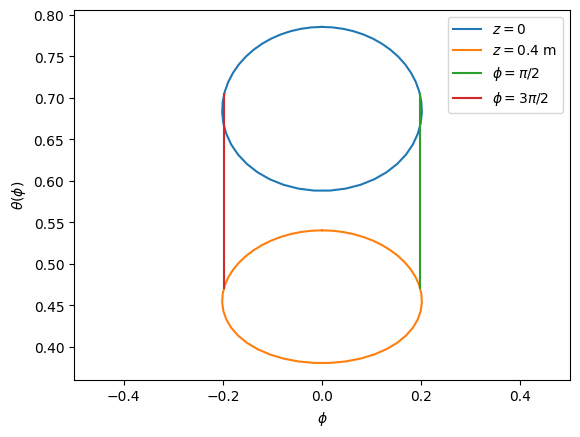

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy

x_c = np.array([0.5, 0, 0.6])
rho = 0.1

def plot_points(pts, xmin, xmax, ylabel="y", xlabel="x", title=None):

    for (xs, ys, label) in pts:

        plt.plot(xs, ys, label=label)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xlim(xmin, xmax)
    plt.legend()
    
    if title:

        plt.title(title)

    plt.show()
    plt.close()

def plot(fs, xmin, xmax, ylabel="y", xlabel="x", title=None):
    
    xs = np.linspace(xmin, xmax, 50, endpoint=True)
    pts = [(xs, [f(x) for x in xs], label) for f, label in fs]

    plot_points(pts, xmin, xmax, ylabel=ylabel, xlabel=xlabel, title=title)

def plot_parametric(fs, xmin, xmax, ylabel="y", xlabel="x", title=None):
    
    pts = []

    for x, y, tmin, tmax, label in fs:

        ts = np.linspace(tmin, tmax, 50, endpoint=True)
        pts.append(([x(t) for t in ts], [y(t) for t in ts], label))

    plot_points(pts, xmin, xmax, ylabel=ylabel, xlabel=xlabel, title=title)

def thetaphi(rho, phi_prime, z_prime):

    r = x_c + [rho * np.cos(phi_prime), rho * np.sin(phi_prime), z_prime]
    r_len = np.linalg.norm(r)

    theta = np.arctan2(np.linalg.norm([r[0], r[1]]), r[2])
    phi = np.arctan2(r[1], r[0])

    return (theta, phi)

plot([
        (lambda z_prime: thetaphi(rho, 0, z_prime)[0],
        "$\\phi'=0$"),
        (lambda z_prime: thetaphi(rho, np.pi / 2, z_prime)[0],
        "$\\phi'=\\pi/2$"),
        (lambda z_prime: thetaphi(rho, np.pi, z_prime)[0],
        "$\\phi'=\\pi$"),
        (lambda z_prime: thetaphi(rho, 3 * np.pi / 2, z_prime)[0],
        "$\\phi'=3\\pi/2$")
    ],
    0, 
    1,
    xlabel="$z'$",
    ylabel="$\\theta(z')$")

plot([
        (lambda z_prime: thetaphi(rho, 0, z_prime)[1],
        "$\\phi'=0$"),
        (lambda z_prime: thetaphi(rho, np.pi / 2, z_prime)[1],
        "$\\phi'=\\pi/2$"),
        (lambda z_prime: thetaphi(rho, np.pi, z_prime)[1],
        "$\\phi'=\\pi$"),
        (lambda z_prime: thetaphi(rho, 3 * np.pi / 2, z_prime)[1],
        "$\\phi'=3\\pi/2$")
    ],
    0, 
    1,
    xlabel="$z'$",
    ylabel="$\\phi(z')$")

plot([
        (lambda phi_prime: thetaphi(rho, phi_prime, 0)[0],
        "$z'=0$"),
        (lambda phi_prime: thetaphi(rho, phi_prime, 0.4)[0],
        "$z'=0.4$ m")
    ],
    0, 
    2 * np.pi,
    xlabel="$\\phi'$",
    ylabel="$\\theta(\\phi')$")

plot([
        (lambda phi_prime: thetaphi(rho, phi_prime, 0)[1],
        "$z'=0$"),
        (lambda phi_prime: thetaphi(rho, phi_prime, 0.4)[1],
        "$z'=0.4$ m")
    ],
    0, 
    2 * np.pi,
    xlabel="$\\phi'$",
    ylabel="$\\phi(\\phi')$")

plot_parametric([
        (lambda phi_prime: thetaphi(rho, phi_prime, 0)[1],
        lambda phi_prime: thetaphi(rho, phi_prime, 0)[0],
        0, 2 * np.pi,
        "$z=0$"),
        (lambda phi_prime: thetaphi(rho, phi_prime, 0.4)[1],
        lambda phi_prime: thetaphi(rho, phi_prime, 0.4)[0],
        0, 2 * np.pi,
        "$z=0.4$ m"),
        (lambda z_prime: thetaphi(rho, np.pi / 2, z_prime)[1],
        lambda z_prime: thetaphi(rho, np.pi / 2, z_prime)[0],
        0, 0.4,
        "$\\phi=\\pi/2$"),
        (lambda z_prime: thetaphi(rho, 3 * np.pi / 2, z_prime)[1],
        lambda z_prime: thetaphi(rho, 3 * np.pi / 2, z_prime)[0],
        0, 0.4,
        "$\\phi=3\\pi/2$")
    ],
    -0.5,
    0.5,
    xlabel="$\\phi$",
    ylabel="$\\theta(\\phi)$")

2.  In the last plot, it is quite obvious that the $\phi'=\pi/2$ and $\phi'=3\pi/2$ lines are not at the maximum and minimum of the $z'=0$ and $z'=0.4.$ curves.  This is because as we get close to the cylinder, the tangent line moves away from top and bottom- if we go all the way up to the cylinder the tangent lines are actually vertical.  

Find the maximum and minimum $\phi$ by writing a function phi(phiprime,zprime), based on your previous function.
Write a second function to calculate the derivative dphidphiprime(phiprime,zprime),and use scipy.optimize.root to find the phiprime where the derivative is zero.  That will be the maximum.  Repeat for both top and bottom and both ends of the cylinder.  

Once you have the new phiprimes, print out the corresponding minimum and maximum phi values.
Then remake the last plot from question 1.


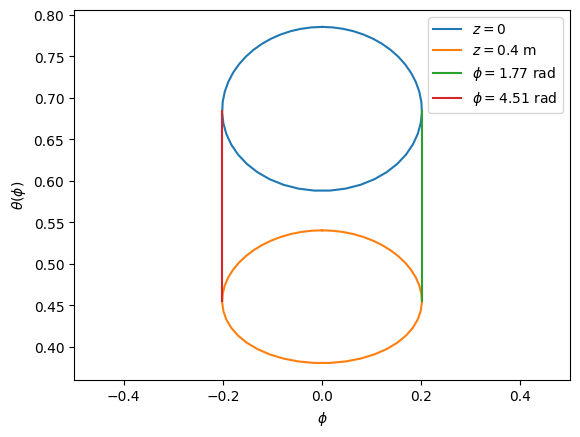

In [4]:
def dphi_dphi_prime(phi_prime, z_prime):

    delta = 1e-5
    x1 = phi_prime + delta
    x2 = x1 - delta

    # pick an arbitrary rho = 0.1
    return (thetaphi(0.1, x1, z_prime)[1] - thetaphi(rho, x2, z_prime)[1]) / (x1 - x2)

def phi_extrema():

    min = scipy.optimize.root(lambda phi_prime: dphi_dphi_prime(phi_prime[0], 0), np.pi / 2).x[0]
    max = scipy.optimize.root(lambda phi_prime: dphi_dphi_prime(phi_prime[0], 0), 3 * np.pi/2).x[0]

    return (min, max)

extrema = phi_extrema()

plot_parametric([
        (lambda phi_prime: thetaphi(rho, phi_prime, 0)[1],
        lambda phi_prime: thetaphi(rho, phi_prime, 0)[0],
        0, 2 * np.pi,
        "$z=0$"),
        (lambda phi_prime: thetaphi(rho, phi_prime, 0.4)[1],
        lambda phi_prime: thetaphi(rho, phi_prime, 0.4)[0],
        0, 2 * np.pi,
        "$z=0.4$ m"),
        (lambda z_prime: thetaphi(rho, extrema[0], z_prime)[1],
        lambda z_prime: thetaphi(rho, extrema[0], z_prime)[0],
        0, 0.4,
        f"$\\phi={extrema[0]:.2f}$ rad"),
        (lambda z_prime: thetaphi(rho, extrema[1], z_prime)[1],
        lambda z_prime: thetaphi(rho, extrema[1], z_prime)[0],
        0, 0.4,
        f"$\\phi={extrema[1]:.2f}$ rad")
    ],
    -0.5,
    0.5,
    xlabel="$\\phi$",
    ylabel="$\\theta(\\phi)$")

3.  Write a function thetaList(phi) that finds the (4) theta values:
$$\vec{r}=\vec{x_c}+(\rho \cos \phi',\rho \sin\phi', z')=r(\sin\theta\cos\phi,\sin\theta\sin\phi,\cos\theta)$$
corresponding to $z'=0, z'=0.4$ with $\phi$ the argument of the function.  Return the values as an np.array, sorted from smallest to biggest.

Plot the smallest and the largest theta values as a function of phi.

$$
(x_c+\rho\cos\phi',y_c+\rho\sin\phi',z_c+z')=(r\sin\theta\cos\phi,r\sin\theta\sin\phi,r\cos\theta),\ \text{where}\ \vec x_c=(x_c,y_c,z_c), \\
$$
so
$$
\begin{aligned}
    x_c+\rho\cos\phi'&=r\sin\theta\cos\phi \\
    y_c+\rho\sin\phi'&=r\sin\theta\sin\phi \\
    z_c+z'&=r\cos\theta.
\end{aligned}
$$
$$
\begin{aligned}
    r&=\frac{x_c+\rho\cos\phi'}{\sin\theta\cos\phi} \\
    \sin\phi'&=\frac{r\sin\theta\sin\phi-y_c}{\rho}
\end{aligned}
$$
Considering the equation for $\sin\phi',\ \cos\phi'$ can be found by <br />
![](triangle.png) <br /> <br />

So
$$
\begin{aligned}
    \cos\phi'&=\frac{\sqrt{\rho^2-(r\sin\theta\sin\phi-y_c)^2}}{\rho} \\
    \rho^2\cos^2\phi'&=\rho^2-(r^2\sin^2\theta\sin^2\phi-2ry_c\sin\theta\sin\phi+y_c^2) \\
    &=-r^2\sin^2\theta\sin^2\phi+2ry_c\sin\theta\sin\phi+\rho^2-y_c^2 \\
    &=-\sin^2\theta\sin^2\phi\frac{x_c^2+2x_c\rho\cos\phi'+\rho^2\cos^2\phi'}{\sin^2\theta\cos^2\phi}+2y_c\sin\theta\sin\phi\frac{x_c+\rho\cos\phi'}{\sin\theta\cos\phi}+\rho^2-y_c^2 \\
    &=-\tan^2\phi(x_c^2+2x_c\rho\cos\phi'+\rho^2\cos^2\phi')+2y_c\tan\phi(x_c+\rho\cos\phi')+\rho^2-y_c^2 \\
    &=-\rho^2\tan^2\phi\cos^2\phi'+(-2x_c\rho\tan^2\phi+2y_c\rho\tan\phi)\cos\phi'+\rho^2-y_c^2-x_c^2\tan^2\phi+2y_cx_c\tan\phi \\
    &\Rightarrow (\rho^2+\rho^2\tan^2\phi)\cos^2\phi'+(2x_c\rho\tan^2\phi-2y_c\rho\tan\phi)\cos\phi'-\rho^2+y_c^2+x_c^2\tan^2\phi-2y_cx_c\tan\phi=a\cos^2\phi'+b\cos\phi'+c=0,
\end{aligned}
$$
and so $\cos\phi'$ can be solved for using the quadratic formula. Using $\pm$ in the quadratic formula will either give a maximum or minimum when solving for $\theta$. Using the last equation,
$$
\begin{aligned}
    z_c+z'&=\cos\theta\frac{x_c+\rho\cos\phi'}{\sin\theta\cos\phi} \\
    &\Rightarrow \cos\theta\frac{x_c+\rho\cos\phi'}{\sin\theta\cos\phi}-z_c-z'=0
\end{aligned}
$$
This equation can be put into the solver to find a value of $\theta$.

[0.38050638 0.5404195  0.5880026  0.78539816]


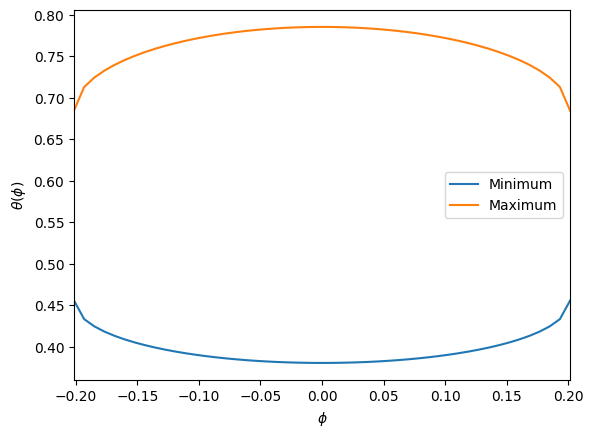

In [5]:
def theta_list(phi):

    def f(theta, phi, z_prime, plus):

        a = rho ** 2 * (1 + np.tan(phi) ** 2)
        b = 2 * x_c[0] * rho * np.tan(phi) ** 2 - 2 * x_c[1] * rho * np.tan(phi)
        c = x_c[1] ** 2 - rho ** 2 + x_c[0] ** 2 * np.tan(phi) ** 2 - 2 * x_c[0] * x_c[1] * np.tan(phi)
        
        cos_phi_prime = (-b + (1 if plus else -1) * np.sqrt(b ** 2 - 4 * a * c)) / (2 * a)
        
        return np.cos(theta) * (x_c[0] + rho * cos_phi_prime) / (np.sin(theta) * np.cos(phi)) - x_c[2] - z_prime

    def get_thetas(phi, z_prime):

        first = scipy.optimize.fsolve(f, [1.], (phi, z_prime, True))[0]
        second = scipy.optimize.fsolve(f, [1.], (phi, z_prime, False))[0]

        return (first, second)
    
    theta_top = get_thetas(phi, 0)
    theta_bottom = get_thetas(phi, 0.4)

    return np.sort([theta_top[0], theta_top[1], theta_bottom[0], theta_bottom[1]])

# these values match the previous graphs, so it looks fine
print(theta_list(0))

# just pick z' = 0 since it's the same anyways
phi_max = thetaphi(rho, extrema[0], 0)[1]
phi_min = thetaphi(rho, extrema[1], 0)[1]

plot([
        (lambda phi: theta_list(phi)[0],
        "Minimum"),
        (lambda phi: theta_list(phi)[3],
        "Maximum")
    ],
    phi_min, 
    phi_max,
    xlabel="$\\phi$",
    ylabel="$\\theta(\\phi)$")

4.  The solid angle is defined as
$$\Omega=\int\int_S \sin\theta d\theta d\phi$$
where we integrate over the surface defined by an object.  Physically $\frac{\Omega}{4\pi}$ would correspond to the fraction of isotropic particle trajectories that would intersect this detector.

Use dblquad to find the solid angle.  You will need to a function based on question (3) to define the theta-integration limits. 

In [6]:
def integrand(theta, phi):

    return np.sin(theta)

solid_angle = scipy.integrate.dblquad(integrand,
                                      phi_min,
                                      phi_max,
                                      lambda phi: theta_list(phi)[0],
                                      lambda phi: theta_list(phi)[3])[0]

print("solid angle: ", solid_angle)

solid angle:  0.08069574468255014
